This is another early attempt to perform personality detection using Bert. Unfortunately, some errors occur
when i tried to pass on my own data.

#Init

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + str(tf.version))

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version <module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>
Running on TPU  ['10.36.180.50:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.36.180.50:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.36.180.50:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import re
import json
import pandas as pd
import numpy as np
import spacy

from numpy import nan

In [12]:
file = '/content/drive/My Drive/Save_3.txt'

with open(file, mode='r+', encoding="utf-8") as script:
	developer = json.load(script)
script.close()
developer = re.sub(r'null','None',developer)

DF1t = pd.DataFrame.from_dict(eval(developer))
DF_ScriptPersoFilm = DF1t.T

In [15]:
Speeches = DF_ScriptPersoFilm['Speech'].tolist()

In [16]:
import gensim

In [17]:
Idx_toDrop = []
for i, speech in enumerate(Speeches):
  CleanSp = gensim.utils.simple_preprocess(speech)
  try:
    if type(CleanSp[0]) is list:
      continue
  except:
    Idx_toDrop.append(i)
    continue

In [18]:
file = '/content/drive/My Drive/Weight_Matrix2.txt'

with open(file, mode="r", encoding="utf-8") as script:
  
  WM_dict = eval(script.read())
script.close()

Weight_Matrix_DF = pd.DataFrame.from_dict(WM_dict)

In [19]:
DF_SPF = DF_ScriptPersoFilm.drop(DF_ScriptPersoFilm.index[Idx_toDrop])

In [20]:
DF_SPF = DF_SPF.reset_index()

In [ ]:
print(len(Weight_Matrix_DF))
print(len(DF_ScriptPersoFilm))
print(len(DF_SPF))

42922
42922
42906


In [21]:
Weight_Matrix_DF['Speech'] = DF_ScriptPersoFilm['Speech'].values

In [22]:
with open('/content/drive/My Drive/CleanSpeeches2.txt', mode="r", encoding="utf-8") as script:
  CleanSpeeches = eval(script.read())
script.close()
print(type(CleanSpeeches))
CleanSpeeches = pd.Series(CleanSpeeches)

Weight_Matrix_DF['CleanSpeeches'] = CleanSpeeches.values

<class 'list'>


In [23]:
print(Weight_Matrix_DF['Speech'].head)
print(Weight_Matrix_DF['CleanSpeeches'].head)

<bound method NDFrame.head of 0        Hey -- sorry. Hey -- sorry. Hey -- sorry. Hey ...
1        Leave it I said, leave it! Why didn't we just ...
2        Did you change your hair? You might wanna thin...
3        No. Who? Great Is he oily or dry? Bianca, I do...
4                                Hey, Bianca. Hey, Bianca.
                               ...                        
42917    Come on, let's grab a couple beers. I do love ...
42918    Of course, I see you brought your own six-pack...
42919    And I don't know what half of who the hell I a...
42920          Not too practical. But at least now I know.
42921              How about we get a game in before dawn?
Name: Speech, Length: 42922, dtype: object>
<bound method NDFrame.head of 0                 hey sorry hey sorry hey sorry hey sorry 
1        leave it said leave it why did we just read th...
2        did you change your hair you might wanna think...
3        no who great is he oily or dry Bianca don thin...
4          

In [24]:
WM_DF_dropna = Weight_Matrix_DF.dropna()

In [25]:
WM_DF_dropna['1vA_aptitude'] = (WM_DF_dropna['aptitude']>=0).astype(int)
WM_DF_dropna['1vA_attention'] = (WM_DF_dropna['attention']>=0).astype(int)
WM_DF_dropna['1vA_pleasantness'] = (WM_DF_dropna['pleasantness']>=0).astype(int)
WM_DF_dropna['1vA_sensitivity'] = (WM_DF_dropna['sensitivity']>=0).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [26]:
print(WM_DF_dropna.head())

   pleasantness  attention  ...  1vA_pleasantness  1vA_sensitivity
0     -0.057000  -0.398500  ...                 0                0
1      0.072277   0.128586  ...                 1                1
2      0.103068   0.253503  ...                 1                0
3      0.151454   0.089043  ...                 1                0
4      0.756000  -1.000000  ...                 1                1

[5 rows x 10 columns]


#Bert

In [27]:
pip install transformers

     |████████████████████████████████| 1.3MB 3.2MB/s 
     |████████████████████████████████| 890kB 7.8MB/s 
     |████████████████████████████████| 1.1MB 16.6MB/s 
     |████████████████████████████████| 2.9MB 23.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=a8c156b09b4ffec1e0506d4a03f474d17494f0606f0f62b57d560cb026a8a50f
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [28]:
!pip install bert-for-tf2
!pip install sentencepiece

     |████████████████████████████████| 51kB 2.1MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.7-cp36-none-any.whl size=30539 sha256=c697299cfcb0c579ecdc0be9567dcb63da77b0512bfed3fa5f973f7005db4006
  Stored in directory: /root/.cache/pip/wheels/e1/f8/e2/b98f79a6b8cc898d8e4102b83acb8a098df7d27500a2bac912
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7304 sha256=9566d8a335f9df2be21ecdd247c0846488fddb889ad5aff05b43c048c4bfbef3
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19475 sha256=4e3e14346747c9c6ce00795c472840284b4268c3a07a1908705b066106c61493
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow


In [29]:
!pip install utils

In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert
import random
import math
import transformers
import tensorflow_datasets as tfds

from transformers import TFBertForSequenceClassification

from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate
from keras import utils

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [31]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


max_length_test = 200
test_sentence = 'Test tokenization sentence. Followed by another sentence'

# add special tokens
test_sentence_with_special_tokens = '[CLS]' + test_sentence + '[SEP]'
tokenized = tokenizer.tokenize(test_sentence_with_special_tokens)
print('tokenized', tokenized)

# convert tokens to ids in WordPiece
input_ids = tokenizer.convert_tokens_to_ids(tokenized)
  
# precalculation of pad length, so that we can reuse it later on
padding_length = max_length_test - len(input_ids)

# map tokens to WordPiece dictionary and add pad token for those text shorter than our max length
input_ids = input_ids + ([0] * padding_length)

# attention should focus just on sequence with non padded tokens
attention_mask = [1] * len(input_ids)

# do not focus attention on padded tokens
attention_mask = attention_mask + ([0] * padding_length)

# token types, needed for example for question answering, for our purpose we will just set 0 as we have just one sequence
token_type_ids = [0] * max_length_test
bert_input = {
    "token_ids": input_ids,
    "token_type_ids": token_type_ids,
    "attention_mask": attention_mask
} 
print(bert_input)


tokenized ['[CLS]', 'test', 'token', '##ization', 'sentence', '.', 'followed', 'by', 'another', 'sentence', '[SEP]']
{'token_ids': [101, 3231, 19204, 3989, 6251, 1012, 2628, 2011, 2178, 6251, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [32]:
bert_input = tokenizer.encode_plus(
                        test_sentence,                      
                        add_special_tokens = True, # add [CLS], [SEP]
                        max_length = max_length_test, # max length of the text that can go to BERT
                        pad_to_max_length = True, # add [PAD] tokens
                        return_attention_mask = True, # add attention mask to not focus on pad tokens
              )
print('encoded', bert_input)

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


encoded {'input_ids': [101, 3231, 19204, 3989, 6251, 1012, 2628, 2011, 2178, 6251, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1944: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [33]:
# map to the expected input to TFBertForSequenceClassification, see here 
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label
def encode_examples(ds, limit=-1):
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
  if (limit > 0):
      ds = ds.take(limit)
    
  for review, label in tfds.as_numpy(ds):

    bert_input = convert_example_to_feature(review.decode())
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

##Attention

In [34]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [35]:
X = []
sentences = WM_DF_dropna["Speech"].to_list()
for sen in sentences:
  X.append(preprocess_text(sen))
y = WM_DF_dropna['1vA_attention'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_train, tf.string),
            tf.cast(y_train, tf.int32)
        )
    )
)

In [ ]:
testing_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_test, tf.string),
            tf.cast(y_test, tf.int32)
        )
    )
)

In [ ]:
# can be up to 512 for BERT
max_length = 512
batch_size = 6

In [ ]:
def convert_example_to_feature(review):
  
  # combine step for tokenization, WordPiece vector mapping, adding special tokens as well as truncating reviews longer than the max length
  
  return tokenizer.encode_plus(review, 
                add_special_tokens = True, # add [CLS], [SEP]
                max_length = max_length, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
              )

In [ ]:
with tpu_strategy.scope():
  # train dataset
  ds_train_encoded = encode_examples(training_dataset).shuffle(10000).batch(batch_size)
  # test dataset
  ds_test_encoded = encode_examples(testing_dataset).batch(batch_size)

Learning rate per epoch:


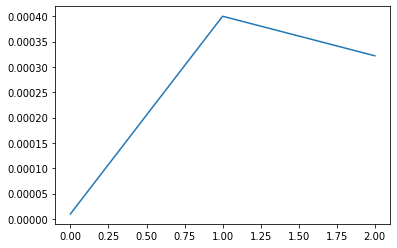

In [ ]:
EPOCHS = 3

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005 * tpu_strategy.num_replicas_in_sync
rampup_epochs = 1
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
  if epoch < rampup_epochs:
    return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
  elif epoch < rampup_epochs + sustain_epochs:
    return max_lr
  else:
    return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr
    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=True)

rang = np.arange(EPOCHS)
y = [lrfn(x) for x in rang]
plt.plot(rang, y)
print('Learning rate per epoch:')

In [ ]:
# recommended learning rate for Adam 5e-5, 3e-5, 2e-5
learning_rate = 5e-5 

# we will do just 1 epoch for illustration, though multiple epochs might be better as long as we will not overfit the model
#number_of_epochs = 2




def create_model():
  # model initialization
  model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

  # choosing Adam optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08)

  # we do not have one-hot vectors, we can use sparce categorical cross entropy and accuracy
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
  model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
  return model

with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model_att = create_model()

In [ ]:
bert_history_att = model_att.fit(ds_train_encoded, epochs=EPOCHS, validation_data=ds_test_encoded, callbacks=[lr_callback])


Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/3
5271/5271 [==============================] - 745s 141ms/step - accuracy: 0.8405 - loss: 0.3842 - val_accuracy: 0.8590 - val_loss: 0.3264 - lr: 1.0000e-05

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0004.
Epoch 2/3
5271/5271 [==============================] - 783s 148ms/step - accuracy: 0.8140 - loss: 0.4981 - val_accuracy: 0.8118 - val_loss: 0.4850 - lr: 4.0000e-04

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000322.
Epoch 3/3
5271/5271 [==============================] - 801s 152ms/step - accuracy: 0.8141 - loss: 0.4845 - val_accuracy: 0.8118 - val_loss: 0.4927 - lr: 3.2200e-04


In [ ]:
final_accuracy = bert_history_att.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

FINAL ACCURACY MEAN-5:  0.8246279358863831


In [ ]:
model_att.save_weights("/content/drive/My Drive/model_att2.h5")

##Aptitude

In [ ]:
X = []
sentences = WM_DF_dropna["Speech"].to_list()
for sen in sentences:
  X.append(preprocess_text(sen))
y = WM_DF_dropna['1vA_aptitude'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_train, tf.string),
            tf.cast(y_train, tf.int32)
        )
    )
)

In [ ]:
testing_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_test, tf.string),
            tf.cast(y_test, tf.int32)
        )
    )
)

In [ ]:
with tpu_strategy.scope():
  # train dataset
  ds_train_encoded = encode_examples(training_dataset).shuffle(10000).batch(batch_size)
  # test dataset
  ds_test_encoded = encode_examples(testing_dataset).batch(batch_size)

In [ ]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model_apt = create_model()

In [ ]:
bert_history_apt = model_apt.fit(ds_train_encoded, epochs=EPOCHS, validation_data=ds_test_encoded, callbacks=[lr_callback])


Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/3
5271/5271 [==============================] - 749s 142ms/step - accuracy: 0.7801 - loss: 0.4616 - val_accuracy: 0.8240 - val_loss: 0.3715 - lr: 1.0000e-05

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0004.
Epoch 2/3
5271/5271 [==============================] - 745s 141ms/step - accuracy: 0.7264 - loss: 0.6034 - val_accuracy: 0.7249 - val_loss: 0.6029 - lr: 4.0000e-04

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000322.
Epoch 3/3
5271/5271 [==============================] - 752s 143ms/step - accuracy: 0.7318 - loss: 0.5912 - val_accuracy: 0.7249 - val_loss: 0.5916 - lr: 3.2200e-04


In [ ]:
final_accuracy = bert_history_apt.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

FINAL ACCURACY MEAN-5:  0.757725199063619


In [ ]:
model_apt.save_weights("/content/drive/My Drive/model_apt2.h5")

##Pleasantness

In [ ]:
X = []
sentences = WM_DF_dropna["Speech"].to_list()
for sen in sentences:
  X.append(preprocess_text(sen))
y = WM_DF_dropna['1vA_pleasantness'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_train, tf.string),
            tf.cast(y_train, tf.int32)
        )
    )
)

In [ ]:
testing_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_test, tf.string),
            tf.cast(y_test, tf.int32)
        )
    )
)

In [ ]:
with tpu_strategy.scope():
  # train dataset
  ds_train_encoded = encode_examples(training_dataset).shuffle(10000).batch(batch_size)
  # test dataset
  ds_test_encoded = encode_examples(testing_dataset).batch(batch_size)

In [ ]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model_plea = create_model()

In [ ]:
bert_history_plea = model_plea.fit(ds_train_encoded, epochs=EPOCHS, validation_data=ds_test_encoded, callbacks=[lr_callback])


Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/3
5271/5271 [==============================] - 748s 142ms/step - accuracy: 0.8093 - loss: 0.4164 - val_accuracy: 0.8410 - val_loss: 0.3645 - lr: 1.0000e-05

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0004.
Epoch 2/3
5271/5271 [==============================] - 750s 142ms/step - accuracy: 0.7880 - loss: 0.5374 - val_accuracy: 0.7890 - val_loss: 0.5160 - lr: 4.0000e-04

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000322.
Epoch 3/3
5271/5271 [==============================] - 761s 144ms/step - accuracy: 0.7889 - loss: 0.5243 - val_accuracy: 0.7890 - val_loss: 0.5163 - lr: 3.2200e-04


In [ ]:
final_accuracy = bert_history_plea.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

FINAL ACCURACY MEAN-5:  0.8081025083859762


In [ ]:
model_plea.save_weights("/content/drive/My Drive/model_plea2.h5")

##Sensitivity

In [ ]:
X = []
sentences = WM_DF_dropna["Speech"].to_list()
for sen in sentences:
  X.append(preprocess_text(sen))
y = WM_DF_dropna['1vA_sensitivity'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_train, tf.string),
            tf.cast(y_train, tf.int32)
        )
    )
)

In [ ]:
testing_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_test, tf.string),
            tf.cast(y_test, tf.int32)
        )
    )
)

In [ ]:
with tpu_strategy.scope():
  # train dataset
  ds_train_encoded = encode_examples(training_dataset).shuffle(10000).batch(batch_size)
  # test dataset
  ds_test_encoded = encode_examples(testing_dataset).batch(batch_size)

In [ ]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model_sens = create_model()

In [ ]:
bert_history_sens = model_sens.fit(ds_train_encoded, epochs=EPOCHS, validation_data=ds_test_encoded, callbacks=[lr_callback])


Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/3
5271/5271 [==============================] - 752s 143ms/step - accuracy: 0.6793 - loss: 0.5939 - val_accuracy: 0.7380 - val_loss: 0.5244 - lr: 1.0000e-05

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0004.
Epoch 2/3
5271/5271 [==============================] - 747s 142ms/step - accuracy: 0.6264 - loss: 0.6656 - val_accuracy: 0.6263 - val_loss: 0.6644 - lr: 4.0000e-04

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000322.
Epoch 3/3
5271/5271 [==============================] - 764s 145ms/step - accuracy: 0.6304 - loss: 0.6610 - val_accuracy: 0.6263 - val_loss: 0.6624 - lr: 3.2200e-04


In [ ]:
final_accuracy = bert_history_sens.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

FINAL ACCURACY MEAN-5:  0.6635048985481262


In [ ]:
model_sens.save_weights("/content/drive/My Drive/model_sens2.h5")

In [ ]:
final_loss_att = bert_history_att.history["val_loss"][-5:]
final_loss_apt = bert_history_apt.history["val_loss"][-5:]
final_loss_plea = bert_history_plea.history["val_loss"][-5:]
final_loss_sens = bert_history_sens.history["val_loss"][-5:]

print("FINAL LOSS MEAN-5: ", np.mean(final_loss_att))
print("")
print("FINAL LOSS MEAN-5: ", np.mean(final_loss_apt))
print("")
print("FINAL LOSS MEAN-5: ", np.mean(final_loss_plea))
print("")
print("FINAL LOSS MEAN-5: ", np.mean(final_loss_sens))

FINAL LOSS MEAN-5:  0.4347021182378133

FINAL LOSS MEAN-5:  0.5220131874084473

FINAL LOSS MEAN-5:  0.4655999143918355

FINAL LOSS MEAN-5:  0.6170739730199178


In [ ]:
model_apt.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_75 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


##### ALL

In [ ]:
X = []
sentences = WM_DF_dropna["Speech"].to_list()
for sen in sentences:
  X.append(preprocess_text(sen))
y = WM_DF_dropna['sensitivity'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_train, tf.string),
            tf.cast(y_train, tf.int32)
        )
    )
)
testing_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_test, tf.string),
            tf.cast(y_test, tf.int32)
        )
    )
)
with tpu_strategy.scope():
  # train dataset
  ds_train_encoded = encode_examples(training_dataset).shuffle(10000).batch(batch_size)
  # test dataset
  ds_test_encoded = encode_examples(testing_dataset).batch(batch_size)

with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model_sens_all = create_model()

bert_history_sens_all = model_sens_all.fit(ds_train_encoded, epochs=EPOCHS, validation_data=ds_test_encoded, callbacks=[lr_callback])

final_accuracy = bert_history_sens_all.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))
final_accuracy = bert_history_sens_all.history["val_loss"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))


Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/3
5271/5271 [==============================] - 754s 143ms/step - accuracy: 0.6708 - loss: 0.6066 - val_accuracy: 0.7086 - val_loss: 0.5510 - lr: 1.0000e-05

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0004.
Epoch 2/3
5271/5271 [==============================] - 749s 142ms/step - accuracy: 0.6246 - loss: 0.6673 - val_accuracy: 0.6263 - val_loss: 0.6617 - lr: 4.0000e-04

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000322.
Epoch 3/3
5271/5271 [==============================] - 765s 145ms/step - accuracy: 0.6308 - loss: 0.6607 - val_accuracy: 0.6263 - val_loss: 0.6662 - lr: 3.2200e-04
FINAL ACCURACY MEAN-5:  0.6537245313326517
FINAL ACCURACY MEAN-5:  0.6262865662574768


In [ ]:
X = []
sentences = WM_DF_dropna["Speech"].to_list()
for sen in sentences:
  X.append(preprocess_text(sen))
y = WM_DF_dropna['pleasantness'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_train, tf.string),
            tf.cast(y_train, tf.int32)
        )
    )
)
testing_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_test, tf.string),
            tf.cast(y_test, tf.int32)
        )
    )
)
with tpu_strategy.scope():
  # train dataset
  ds_train_encoded = encode_examples(training_dataset).shuffle(10000).batch(batch_size)
  # test dataset
  ds_test_encoded = encode_examples(testing_dataset).batch(batch_size)

with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model_plea_all = create_model()

bert_history_plea_all = model_plea_all.fit(ds_train_encoded, epochs=EPOCHS, validation_data=ds_test_encoded, callbacks=[lr_callback])

final_accuracy = bert_history_plea_all.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))
final_accuracy = bert_history_plea_all.history["val_loss"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))


Epoch 00001: LearningRateScheduler reducing learning rate to 1e-05.
Epoch 1/3
5271/5271 [==============================] - 755s 143ms/step - accuracy: 0.9996 - loss: nan - val_accuracy: 1.0000 - val_loss: nan - lr: 1.0000e-05

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0004.
Epoch 2/3
5271/5271 [==============================] - 746s 142ms/step - accuracy: 0.9998 - loss: nan - val_accuracy: 1.0000 - val_loss: nan - lr: 4.0000e-04

Epoch 00003: LearningRateScheduler reducing learning rate to 0.000322.
Epoch 3/3
5271/5271 [==============================] - 747s 142ms/step - accuracy: 0.9998 - loss: nan - val_accuracy: 1.0000 - val_loss: nan - lr: 3.2200e-04
FINAL ACCURACY MEAN-5:  1.0
FINAL ACCURACY MEAN-5:  nan


In [ ]:
X = []
sentences = WM_DF_dropna["Speech"].to_list()
for sen in sentences:
  X.append(preprocess_text(sen))
y = WM_DF_dropna['aptitude'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_train, tf.string),
            tf.cast(y_train, tf.int32)
        )
    )
)
testing_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_test, tf.string),
            tf.cast(y_test, tf.int32)
        )
    )
)
with tpu_strategy.scope():
  # train dataset
  ds_train_encoded = encode_examples(training_dataset).shuffle(10000).batch(batch_size)
  # test dataset
  ds_test_encoded = encode_examples(testing_dataset).batch(batch_size)

with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model_apt_all = create_model()

bert_history_apt_all = model_apt_all.fit(ds_train_encoded, epochs=EPOCHS, validation_data=ds_test_encoded, callbacks=[lr_callback])

final_accuracy = bert_history_apt_all.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))
final_accuracy = bert_history_apt_all.history["val_loss"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

KeyboardInterrupt: ignored

In [ ]:
print(WM_DF_dropna['1vA_attention'].sum())
print(WM_DF_dropna['1vA_aptitude'].sum())
print(WM_DF_dropna['1vA_sensitivity'].sum())
print(WM_DF_dropna['1vA_pleasantness'].sum())
print(len(WM_DF_dropna))

32166
28884
24908
31187
39532


In [ ]:
countList = []
for elem in WM_DF_dropna['CleanSpeeches']:
  countList.append(len(elem.split()))

In [ ]:
WM_DF_dropna['Count'] = countList

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
DF_Data = WM_DF_dropna[WM_DF_dropna['Count']>= 100]

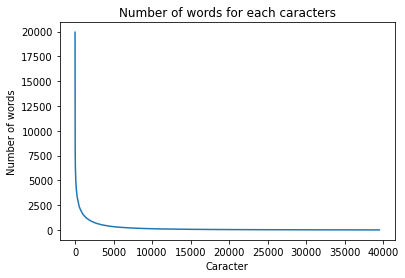

In [ ]:
countList.sort(reverse=True)
plt.plot(countList)
plt.title('Number of words for each caracters')
plt.ylabel('Number of words')
plt.xlabel('Caracter')
plt.show()

In [ ]:
DF_Data['Count'].median()

278.0

In [ ]:
DF_Data['Count'].mean()

622.6559253389681

In [ ]:
X = []
sentences = DF_Data["Speech"].to_list()
for sen in sentences:
  X.append(preprocess_text(sen))
y = WM_DF_dropna['1vA_attention'].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_train, tf.string),
            tf.cast(y_train, tf.int32)
        )
    )
)
testing_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(X_test, tf.string),
            tf.cast(y_test, tf.int32)
        )
    )
)
with tpu_strategy.scope():
  # train dataset
  ds_train_encoded = encode_examples(training_dataset).shuffle(10000).batch(batch_size)
  # test dataset
  ds_test_encoded = encode_examples(testing_dataset).batch(batch_size)

with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model_att_all = create_model()

bert_history_att_all = model_att_all.fit(ds_train_encoded, epochs=EPOCHS, validation_data=ds_test_encoded, callbacks=[lr_callback])

final_accuracy = bert_history_att_all.history["val_accuracy"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))
final_accuracy = bert_history_att_all.history["val_loss"][-5:]
print("FINAL ACCURACY MEAN-5: ", np.mean(final_accuracy))

ValueError: ignored

#graph

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(bert_history_att.history)

{'loss': [0.4271378219127655, 0.49445512890815735, 0.4938468635082245, 0.5034235715866089, 0.4962282180786133], 'accuracy': [0.8269799947738647, 0.8116990327835083, 0.813424289226532, 0.8126848936080933, 0.8130956292152405], 'val_loss': [0.4086622893810272, 0.48091816902160645, 0.4885491132736206, 0.48036473989486694, 0.4820842444896698], 'val_accuracy': [0.8206307291984558, 0.8157029747962952, 0.8157029747962952, 0.8157029747962952, 0.8157029747962952], 'lr': [1e-05, 0.00014, 0.00027, 0.0004, 0.000322]}


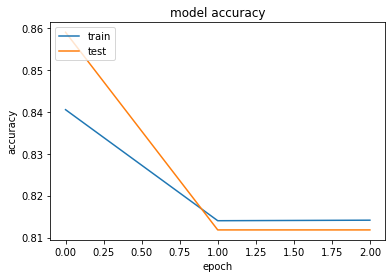

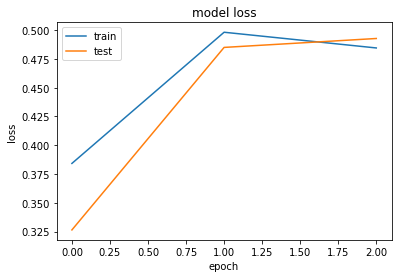

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(bert_history_att.history['accuracy'])
plt.plot(bert_history_att.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.savefig('/content/drive/My Drive/plt_acc_att.png')

plt.plot(bert_history_att.history['loss'])
plt.plot(bert_history_att.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.savefig('/content/drive/My Drive/plt_loss_att.png')

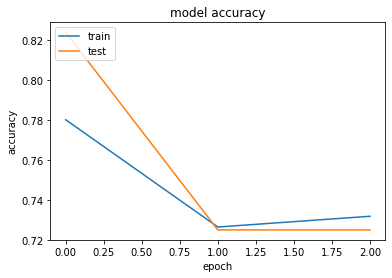

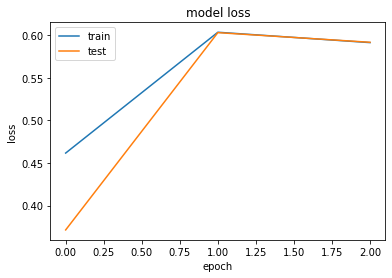

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(bert_history_apt.history['accuracy'])
plt.plot(bert_history_apt.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.savefig('/content/drive/My Drive/plt_acc_apt.png')

plt.plot(bert_history_apt.history['loss'])
plt.plot(bert_history_apt.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.savefig('/content/drive/My Drive/plt_loss_apt.png')

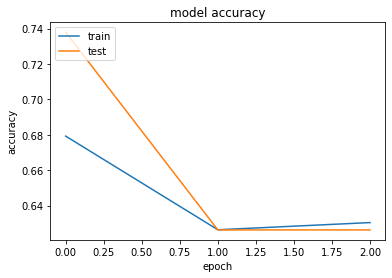

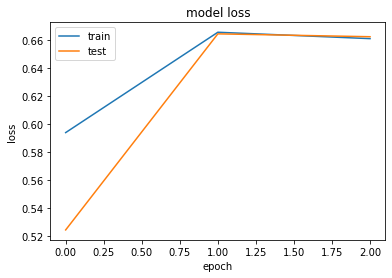

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(bert_history_sens.history['accuracy'])
plt.plot(bert_history_sens.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.savefig('/content/drive/My Drive/plt_acc_sens.png')

plt.plot(bert_history_sens.history['loss'])
plt.plot(bert_history_sens.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.savefig('/content/drive/My Drive/plt_loss_sens.png')

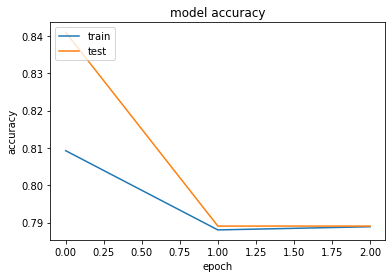

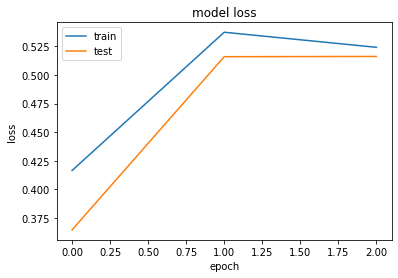

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(bert_history_plea.history['accuracy'])
plt.plot(bert_history_plea.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.savefig('/content/drive/My Drive/plt_acc_plea.png')

plt.plot(bert_history_plea.history['loss'])
plt.plot(bert_history_plea.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.savefig('/content/drive/My Drive/plt_loss_plea.png')

In [ ]:
WM_DF_dropna[['1vA_aptitude','1vA_attention','1vA_pleasantness','1vA_sensitivity']].sum()

#Save

In [ ]:
from keras.models import load_model

In [ ]:
model_apt.save_weights('/content/drive/My Drive/model_apt.h5')
model_att.save_weights('/content/drive/My Drive/model_att.h5')
model_sens.save_weights('/content/drive/My Drive/model_sens.h5')
model_plea.save_weights('/content/drive/My Drive/model_plea.h5')